### Multivariate Linear Regression

In [401]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics 

In [402]:
# import data

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [404]:
# Drop column yang tidak berpengaruh(0) dan column yang nilainya < 1201

df = df.drop(df.columns[[0, 6, 57, 72, 73, 74]],axis = 1)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [406]:
# Fill NA column categorical dengan nilai modus

cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [407]:
# Fill NA column integer atau float dengan nilai mean
df[['MasVnrArea', 'GarageYrBlt']] = df[['MasVnrArea', 'GarageYrBlt']].fillna(df[['MasVnrArea', 'GarageYrBlt']].mean())

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [409]:
# Drop baris yang terdapat nilai NaN

df = df.dropna()
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [410]:
# Sehingga, jumlah keseluruhan baris nya menjadi 1201

In [411]:
# One hot encoding

df = pd.get_dummies(df)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [412]:
# Defining feature matrix(X) and Response vector(y)

X = df.loc[:, df.columns != 'SalePrice']
y = df['SalePrice']

In [413]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [414]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1201, dtype: int64

In [415]:
# splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
print(len(y_test))

481


In [416]:
# Create linear regression object
reg = linear_model.LinearRegression()
 
# Train the model using the training sets
reg.fit(X_train, y_train)

# Regression coefficients
print('Coefficients: ', reg.coef_)

# Regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [ 1.08881105e+02 -5.29942872e+01  1.32901843e+00  5.59425884e+03
  5.37650781e+03  3.39505364e+02  1.19331178e+02 -9.44318144e-01
  1.43632680e+01  6.01947109e+00  4.66584285e-02  2.04293591e+01
  3.18656871e+01  3.44505941e+01 -3.48768681e+01  3.14394632e+01
 -3.49664441e+02 -5.12309722e+03  6.69494808e+03  4.91839519e+03
 -2.83054031e+03  5.87007426e+03 -7.68838822e+02  5.47951256e+02
  3.68214544e+01  3.18776713e+03  1.23301427e+01  1.27921860e+01
  1.78756419e+01 -3.52101936e+01  5.82495376e+01  2.59338481e+01
  1.23547875e+02 -7.58149086e+00  6.55089788e+01  1.39561189e+02
 -3.35532710e+04  1.95199824e+04  1.52722924e+03  6.35419440e+03
  6.15186503e+03 -2.66119455e+04  2.66119455e+04  1.94625682e+02
  4.36579337e+03 -8.38299028e+03  3.82257123e+03  5.45369681e+03
  6.20240460e+03 -1.47471411e+04  3.09103965e+03 -1.49702828e-09
  2.66974426e+03  1.27977793e+04 -3.68503076e+03 -1.57735293e+04
  3.99103649e+03  3.81766409e+04  4.33730837e+04 -8.15497246e+04
  8.193834

Variance score: 0.8060960804426386


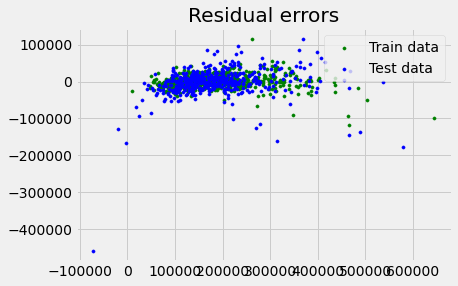

In [417]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [418]:
#Evaluation

In [419]:
y_pred = reg.predict(X_test)

In [420]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

21954.03226396738

In [421]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1453436073.1787834

In [422]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

38123.956683151126

In [423]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8060960804426386

#### Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”)

Maka dapat disimpulkan bahwa:

- Menggunakan matrix MAE prediksi SalePrice memiliki `range eror rata-rata -21954 hingga +21954` dari harga aslinya.

- Menggunakan matrix RMSE prediksi SalePrice memiliki `range eror maksimal -38123 hingga +38213` dari harga aslinya.

- Menggunakan matrix R2 prediksi SalePrice memiliki `range eror 0.8`. Yang artinya prediksinya bagus. 

### Classification Models

In [424]:
# import data

df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [426]:
# One hot encoding

df = pd.get_dummies(df)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [427]:
# Defining feature matrix(X) and Response vector(y)

X = df.loc[:, df.columns != 'HeartDisease']
y = df['HeartDisease']

In [428]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)
print(len(y_test))

368


In [429]:
# Logistic Regression

In [430]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
lr = lr.fit(X_train, y_train)

In [431]:
# Hyperparameter Tuning

In [432]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [433]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [434]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [435]:
grid_search.best_score_

0.8617502380196762

In [436]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [437]:
# Setelah mendapatkan nilai hyperparameter tuning nya, maka nilai tersebut akan dimasukkan ke parameter Random Forest nya.

In [438]:
# Random Forest

In [439]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3, 
                                       n_estimators=30, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30, n_jobs=-1, oob_score=True,
                       random_state=42)

In [440]:
# Evaluation

In [441]:
y_lr = lr.predict(X_test)
y_rf = rf_best.predict(X_test)

In [442]:
# Confusion Matrix

In [443]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_rf))

[[132  15]
 [ 35 186]]
[[129  18]
 [ 27 194]]


In [444]:
# Classification Report

In [445]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_rf))

0.8641304347826086
0.8777173913043478


In [446]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

0.8578961480025025
0.8710087082728593


In [447]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

0.8697940714747437
0.8776895373534028


In [448]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.93      0.84      0.88       221

    accuracy                           0.86       368
   macro avg       0.86      0.87      0.86       368
weighted avg       0.87      0.86      0.87       368

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       147
           1       0.92      0.88      0.90       221

    accuracy                           0.88       368
   macro avg       0.87      0.88      0.87       368
weighted avg       0.88      0.88      0.88       368



In [449]:
# AUC

In [450]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1)
print(auc(fpr, tpr))

0.8697940714747437
0.8776895373534028


#### Kesimpulan

Model yang lebih baik dalam memprediksi "Heart Disease" adalah `Random Forest`, karena bisa kita lihat pada percobaan Confusion Matrix, Classification Report, dan AUC, Random Forest memiliki nilai yang `lebih tinggi` dibandingkan Logistic Regression.